##### torchvision 제공 이미지 전처리 관련 기능
 - torchvision.transforms 서브 모듈
    * 이미지 크기 조절
    * 이미지 정규화
    * 이미지 자르기
    * 이미지 회전 등등 다양한 기능 제공
    * 이미지 데이터 타입 ==> Pillow Image

 - 모듈 로딩 및 데이터 설정

In [43]:
import cv2  # 이미지 데이터 ndarray
from torchvision import transforms
import torch
from PIL import Image   # 이미지 데이터 JPGImage
import numpy as np
import matplotlib.pyplot as plt

# from torchvision import transforms


In [44]:
## 데이터 관련 설정
IMG_PATH = "../image/"
IMG_FILE = IMG_PATH+'DRR.jpg'

 - OpenCv & pillow <hr>

In [45]:
cv_img = cv2.imread(IMG_FILE)
# cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB) # bgr => rgb
# cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BAYER_GBRG2GRAY) # bgr => rgb
pil_img = Image.open(IMG_FILE)

In [46]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


 - ndarray ===> Tensor <hr>

In [47]:
# 일반적인 텐서 생성
cvTensor1 = torch.tensor(cv_img)
print(f'cvTensor1 : {cvTensor1.shape}, {cvTensor1.ndim}D')


# 이미지용 텐서 생성
cvTensor2 = transforms.ToTensor()(cv_img)
print(f'cvTensor1 : {cvTensor2.shape}, {cvTensor2.ndim}D')

cvTensor1 : torch.Size([650, 656, 3]), 3D
cvTensor1 : torch.Size([3, 650, 656]), 3D


In [48]:
# 일반적인 텐서 생성 [H,W,C]
pilTensor1 = torch.tensor(np.array(pil_img))
print(f'pilTensor1 : {pilTensor1.shape}, {pilTensor1.ndim}D')

# 이미지용 텐서 생성 : 채널 순서 / 위치 자동 [C, H, W]
pilTensor2 = transforms.ToTensor()(np.array(pil_img))
print(f'pilTensor2 : {pilTensor2.shape}, {pilTensor2.ndim}D')

pilTensor3 = transforms.PILToTensor()(pil_img)
print(f'pilTensor3 : {pilTensor3.shape}, {pilTensor3.ndim}')

pilTensor1 : torch.Size([650, 656, 3]), 3D
pilTensor2 : torch.Size([3, 650, 656]), 3D
pilTensor3 : torch.Size([3, 650, 656]), 3


 - Tensor ==> Ndrray <hr>

cvNP : (650, 656, 3),3D


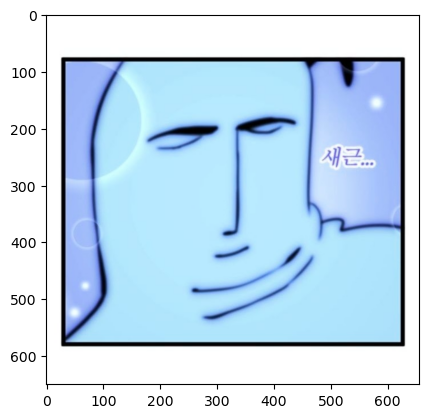

In [49]:
cvNP = cvTensor1.numpy()
print(f'cvNP : {cvNP.shape},{cvNP.ndim}D')
plt.imshow(cvNP)
plt.show()

In [53]:
from torchvision.transforms import v2
v2.ToImage()(cv_img).shape

torch.Size([3, 650, 656])

 - Tensor ==> PILImage<hr>

In [55]:
pilIMG1 = transforms.ToPILImage()(pilTensor2)
print(f'pilIMG1 : {pilIMG1.width}, {pilIMG1.height}, {pilIMG1.mode}')
pilIMG1.show()

pilIMG1 : 656, 650, RGB
